In [1]:
from keras.datasets import mnist
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

In [2]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
import numpy as np

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
train_X
train_Y
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
from keras.utils import normalize
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = normalize(train_X, axis=1)
test_X = normalize(test_X, axis=1)

In [6]:
from keras.utils import to_categorical

train_Y_argmax = to_categorical(train_Y)
test_Y_argmax = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to argmax:', train_Y_argmax[0])

Original label: 5
After conversion to argmax: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_argmax, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [8]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 200
epochs = 10
learn_rate = 0.01

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
from keras import losses
from keras import optimizers

model.compile(loss=losses.categorical_crossentropy, 
              optimizer=optimizers.Adam(learning_rate=learn_rate),
              metrics=['accuracy'])


train = model.fit(train_X, train_label, batch_size = batch_size, epochs=epochs, validation_data = (valid_X, valid_label))

Epoch 1/10
240/240 [==============================] - 23s 96ms/step - loss: 0.3015 - accuracy: 0.9033 - val_loss: 0.0692 - val_accuracy: 0.9791
Epoch 2/10
240/240 [==============================] - 27s 111ms/step - loss: 0.0669 - accuracy: 0.9792 - val_loss: 0.0686 - val_accuracy: 0.9786
Epoch 3/10
240/240 [==============================] - 28s 118ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 4/10
240/240 [==============================] - 24s 100ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0533 - val_accuracy: 0.9846
Epoch 5/10
240/240 [==============================] - 23s 96ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 0.0602 - val_accuracy: 0.9823
Epoch 6/10
240/240 [==============================] - 21s 90ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0531 - val_accuracy: 0.9859
Epoch 7/10
240/240 [==============================] - 21s 89ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0654 - val_accura

In [11]:
test_eval = model.evaluate(test_X, test_Y_argmax)

313/313 [==============================] - 2s 5ms/step - loss: 0.0620 - accuracy: 0.9854


In [21]:
train.history

{'loss': [0.30152273178100586,
  0.06690849363803864,
  0.04944826662540436,
  0.0387905053794384,
  0.04140940681099892,
  0.038788918405771255,
  0.033977359533309937,
  0.03323734179139137,
  0.03511473536491394,
  0.035422053188085556],
 'accuracy': [0.903291642665863,
  0.9791666865348816,
  0.9848958253860474,
  0.9873958230018616,
  0.9871458411216736,
  0.9878333210945129,
  0.9897916913032532,
  0.9897291660308838,
  0.989187479019165,
  0.9899374842643738],
 'val_loss': [0.06919719278812408,
  0.0686202347278595,
  0.0489744208753109,
  0.0533236600458622,
  0.060189422219991684,
  0.053053226321935654,
  0.0653645396232605,
  0.06618618965148926,
  0.06809209287166595,
  0.0589282363653183],
 'val_accuracy': [0.9790833592414856,
  0.9785833358764648,
  0.984333336353302,
  0.98458331823349,
  0.9823333621025085,
  0.9859166741371155,
  0.984083354473114,
  0.9850000143051147,
  0.984333336353302,
  0.9855833053588867]}

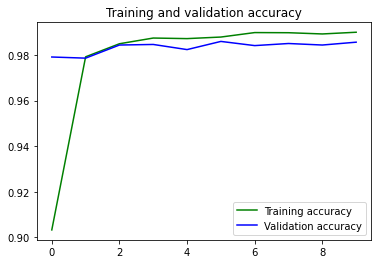

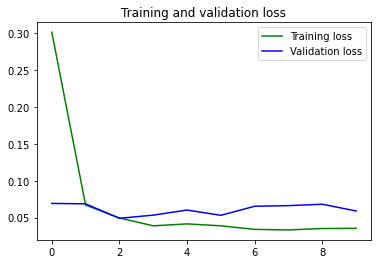

In [12]:
import matplotlib.pyplot as plt

accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', color="g", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', color="g", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
batch_size = 200
epochs = 10
learn_rate = 0.01

model_mlp = Sequential()
model_mlp.add(Flatten())
model_mlp.add(Dense(128, activation='relu'))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))

In [14]:
model_mlp.compile(loss=losses.categorical_crossentropy, 
              optimizer=optimizers.Adam(learning_rate=learn_rate),
              metrics=['accuracy'])


train_mlp = model_mlp.fit(train_X, train_label, batch_size = batch_size, epochs=epochs, validation_data = (valid_X, valid_label))

Epoch 1/10
240/240 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.9189 - val_loss: 0.1447 - val_accuracy: 0.9552
Epoch 2/10
240/240 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9627 - val_loss: 0.1147 - val_accuracy: 0.9670
Epoch 3/10
240/240 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9740 - val_loss: 0.1077 - val_accuracy: 0.9688
Epoch 4/10
240/240 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9785 - val_loss: 0.1156 - val_accuracy: 0.9678
Epoch 5/10
240/240 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.1244 - val_accuracy: 0.9682
Epoch 6/10
240/240 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.1213 - val_accuracy: 0.9675
Epoch 7/10
240/240 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.1435 - val_accuracy: 0.9659
Epoch 

In [15]:
test_eval = model_mlp.evaluate(test_X, test_Y_argmax)

313/313 [==============================] - 0s 751us/step - loss: 0.1586 - accuracy: 0.9679


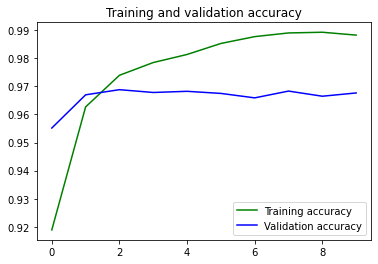

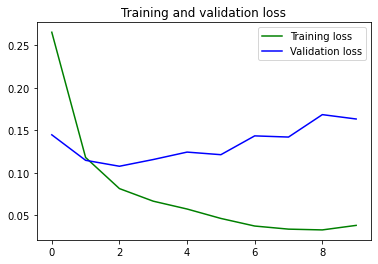

In [16]:
accuracy = train_mlp.history['accuracy']
val_accuracy = train_mlp.history['val_accuracy']
loss = train_mlp.history['loss']
val_loss = train_mlp.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', color="g", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', color="g", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()